In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from PopSynthesis.Methods.connect_HH_PP.paras_dir import processed_data, output_dir, data_dir

In [2]:
font = {'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)

geo_lev = "POA"

In [3]:
syn_hh_ipu = pd.read_csv(os.path.join(output_dir, "new_test","syn_hh_ipu.csv"))
syn_hh_ipu = syn_hh_ipu.drop(columns=["serialno", "cat_id", "sample_geog"])
syn_hh_ipu = syn_hh_ipu.rename(columns={"geog": "POA"})
syn_hh_ipu["hhid"] = syn_hh_ipu.index
syn_hh_adjust = pd.read_csv(os.path.join(output_dir,"new_test", f"syn_hh_final_POA_ad5.csv"))
syn_hh_noad = pd.read_csv(os.path.join(output_dir,"new_test", f"hh_no_adjustments.csv"))

In [4]:
syn_hh_adjust = syn_hh_adjust.drop(columns=["Spouse", "Child", "Others", "Grandchild"])
syn_hh_adjust

,dwelltype,owndwell,hhinc,totalvehs,hhsize,POA,hhid
0,Terrace/Townhouse,Something Else,Nil income,3,5,3583,2334366
1,Flat or Apartment,Being Purchased,1-149,0,1,3000,1162271
2,Flat or Apartment,Being Purchased,1-149,0,1,3000,1163023
3,Flat or Apartment,Being Purchased,1-149,0,1,3000,1163137
4,Flat or Apartment,Being Purchased,1-149,0,1,3000,1163284
...,...,...,...,...,...,...,...
2420216,Separate House,Something Else,400-499,2,1,3996,2864678
2420217,Separate House,Something Else,800-999,2,1,3996,2864679
2420218,Other,Being Purchased,500-649,2,1,3996,2864680
2420219,Terrace/Townhouse,Being Purchased,Nil income,2,1,3996,2864681


In [5]:
ls_atts_hh = [x for x in syn_hh_adjust.columns if x not in ["relationship", "POA", "hhid"]]
atts_hh_labels = {att: list(syn_hh_adjust[att].unique()) for att in ls_atts_hh}
atts_hh_labels["totalvehs"] = ['0', '1', '2', '3', '4+']
atts_hh_labels["hhsize"] = ['1', '2', '3', '4', '5', '6', '7', '8+']
atts_hh_labels["hhinc"] = [
'Negative income',
'Nil income',
  '1-149',
  '150-299',
  '300-399',
  '400-499',
  '500-649',
  '650-799',
  '800-999',
  '1000-1249',
  '1250-1499',
  '1500-1749',
  '1750-1999',
  '2000-2499',
  '2500-2999',
  '3000-3499',
  '3500-3999',
  '4000-4499',
  '4500-4999',
  '5000-5999',
  '6000-7999',
  '8000+',
]
atts_hh_labels

{'dwelltype': ['Terrace/Townhouse',
  'Flat or Apartment',
  'Missing',
  'Other',
  'Separate House'],
 'owndwell': ['Something Else',
  'Being Purchased',
  'Being Rented',
  'Fully Owned'],
 'hhinc': ['Negative income',
  'Nil income',
  '1-149',
  '150-299',
  '300-399',
  '400-499',
  '500-649',
  '650-799',
  '800-999',
  '1000-1249',
  '1250-1499',
  '1500-1749',
  '1750-1999',
  '2000-2499',
  '2500-2999',
  '3000-3499',
  '3500-3999',
  '4000-4499',
  '4500-4999',
  '5000-5999',
  '6000-7999',
  '8000+'],
 'totalvehs': ['0', '1', '2', '3', '4+'],
 'hhsize': ['1', '2', '3', '4', '5', '6', '7', '8+']}

In [6]:
def plot_bar_syn(att, att_lab):

    df_ipu = syn_hh_ipu
    df_adjust = syn_hh_adjust
    df_noad = syn_hh_noad

    n_ipu = len(df_ipu) 
    counts_ipu = df_ipu[att].value_counts()

    n_adjust = len(df_adjust) 
    counts_adjust = df_adjust[att].value_counts()

    n_noad = len(df_noad) 
    counts_noad = df_noad[att].value_counts()

    data_ipu = []
    data_adjust = []
    data_noad = []
    data_sample = []


    df_sample = pd.read_csv(os.path.join(processed_data, f"ori_sample_hh.csv"))
    sub_df_sample = df_sample[att].value_counts()
    n_sample = len(df_sample)
    sub_df_sample = sub_df_sample / n_sample

    for state in att_lab[att]:
        if state in counts_ipu.index:
            data_ipu.append((counts_ipu.at[state]/n_ipu)*100) 
        else:
            data_ipu.append(0) 

        if state in counts_adjust.index:
            data_adjust.append((counts_adjust.at[state]/n_adjust)*100) 
        else:
            data_adjust.append(0)

        if state in counts_noad.index:
            data_noad.append((counts_noad.at[state]/n_noad)*100) 
        else:
            data_noad.append(0)

        if state in sub_df_sample.index:
            data_sample.append((sub_df_sample[state])*100)
        else:
            data_sample.append(0)

    X = att_lab[att]
    X_axis = np.arange(len(X))
    fig = plt.figure(figsize = (10, 5))
    # creating the bar plot
    plt.bar(X_axis - 0.25, data_adjust, 0.1, label = 'SAA')
    plt.bar(X_axis - 0.15, data_ipu, 0.1, label = 'IPU') 
    plt.bar(X_axis - 0.05, data_adjust, 0.1, label = 'BN')
    plt.bar(X_axis + 0.1, data_sample, 0.2, label = 'VISTA') 

    plt.title(f"{att}")
    # plt.xlabel(f"States")
    plt.ylabel(f"% of the whole population")
    
    plt.xticks(X_axis, X, rotation=90)
    plt.legend()
    plt.tight_layout()

    plt.savefig(f"./output/imgs/samples/hh_{att}_samples_compa")
    return {
        "vista": data_sample,
        "ipu": data_ipu,
        "simplebn": data_noad, 
        "adjust": data_adjust,
        "states": list(att_lab[att])
    }

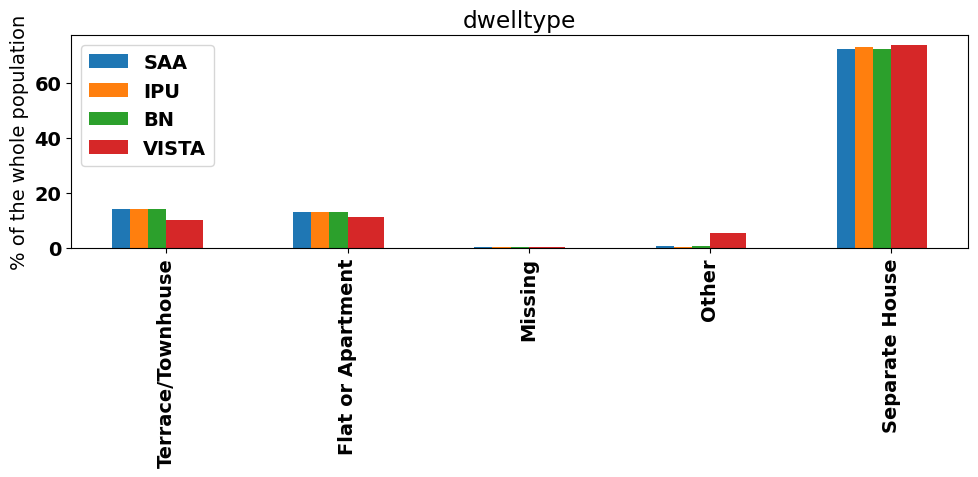

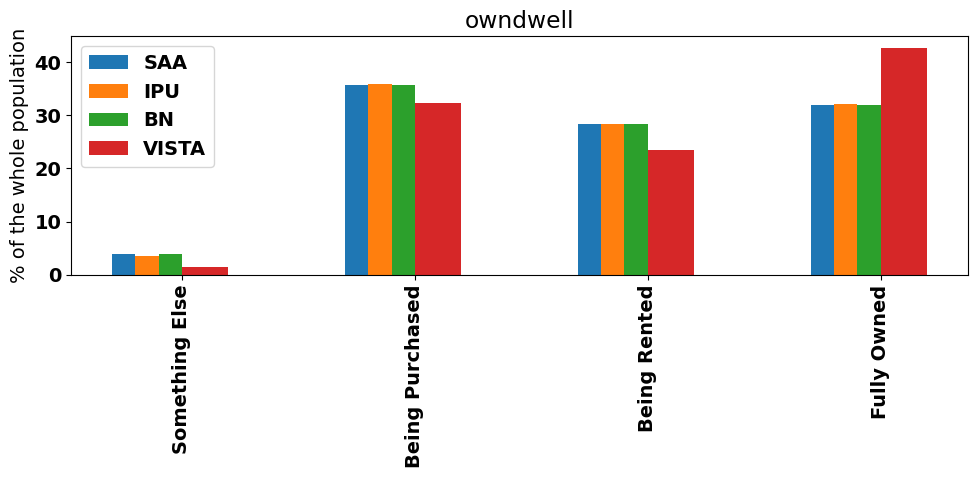

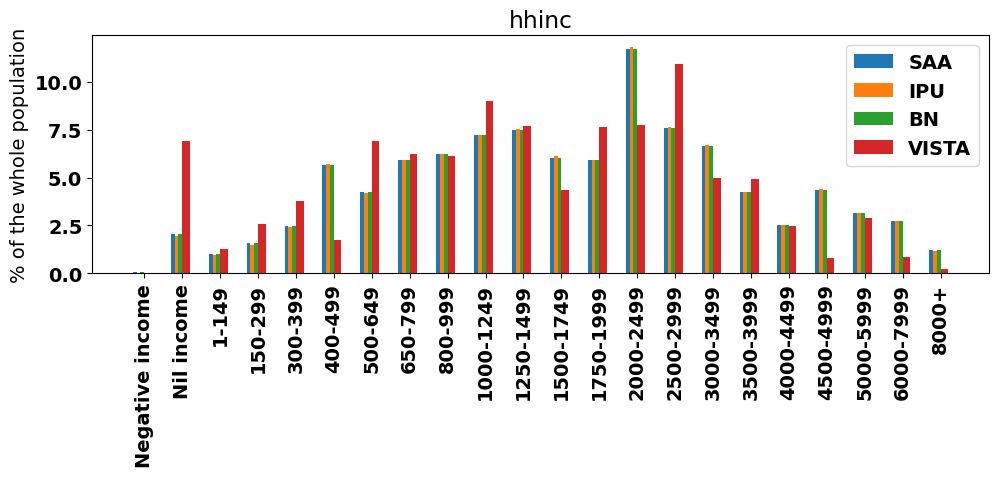

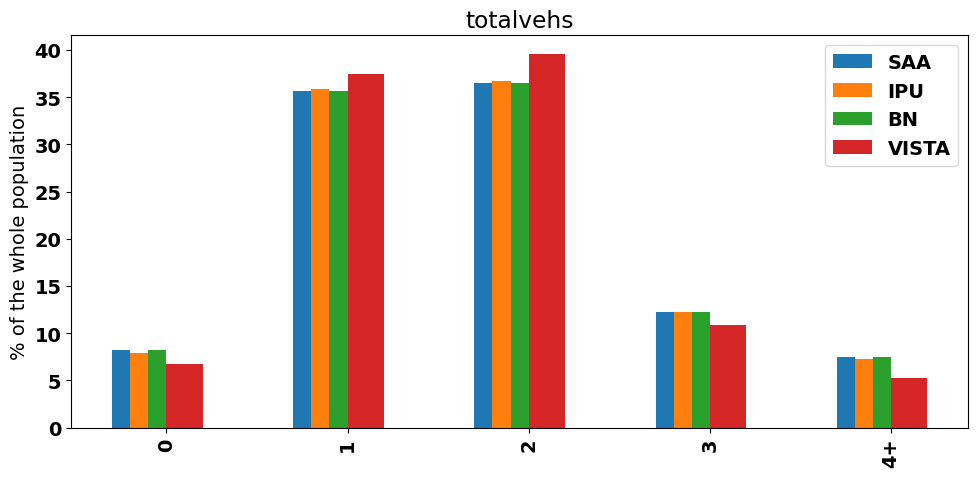

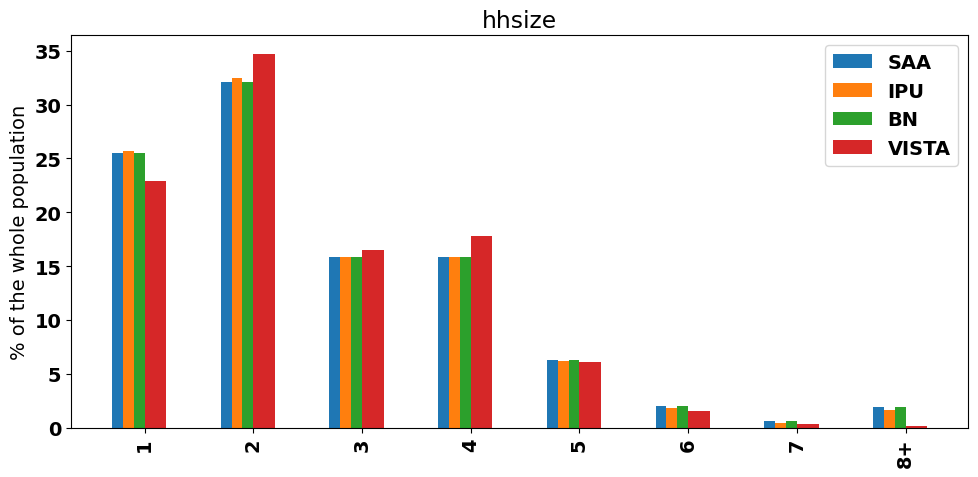

In [8]:
hold_dict_hh = {}
for att in atts_hh_labels:
    re_dict = plot_bar_syn(att=att, att_lab=atts_hh_labels)
    hold_dict_hh[att] = re_dict

In [9]:
from scipy.spatial.distance import jensenshannon

In [12]:
def process_dict_data(dict_d):
    d_df = []
    ls_names = []
    for key, d in dict_d.items():
        score_ipu = jensenshannon(d["vista"], d["ipu"], base=2)
        score_adjust = jensenshannon(d["vista"], d["adjust"], base=2)
        score_noad = jensenshannon(d["vista"], d["simplebn"], base=2)
        d_df.append([score_adjust, score_ipu, score_noad])
        ls_names.append(key)

    cols_names = ["SAA", "IPU", "BN"]
    df_all_scores = pd.DataFrame(d_df, index=ls_names, columns=cols_names)
    return df_all_scores

In [13]:
df_re_hh = process_dict_data(hold_dict_hh)
df_re_hh

,SAA,IPU,BN
dwelltype,0.139867,0.150100,0.049081
owndwell,0.109930,0.105409,0.024035
hhinc,0.217153,0.219483,0.026797
totalvehs,0.052036,0.047846,0.046980
hhsize,0.090671,0.080617,0.053178
